# DataJoint Element for Pose Estimation with DeepLabCut

**Open-source Data Pipeline for Markerless Pose Estimation in Neurophysiology**

This tutorial focuses on providing a comprehensive understanding of the open-source data pipeline offered by `Element-DeepLabCut`. 

![pipeline](../images/flowchart.svg)

The package is designed to facilitate pose estimation analyses and streamline the organization of data using `DataJoint`. 

![pipeline](../images/pipeline.svg)

By the end of this tutorial, participants will have a clear grasp of how to set up and apply the Element DeepLabCut for their specific pose estimation projects. 

**Key Components and Objectives**

- Setup

- Design the DataJoint Pipeline

- Step 1 - Register an existing model in DataJoint pipeline

- Step 2 - Insert Subject, Session, and Behavior Videos

- Step 3 - DLC inference task

- Step 4 - Visualization of results

For detailed documentation and tutorials on general DataJoint principles that support collaboration, automation, reproducibility, and visualizations:

[`DataJoint for Python - Interactive Tutorials`](https://github.com/datajoint/datajoint-tutorials) - Fundamentals including table tiers, query operations, fetch operations, automated computations with the make function, etc.

[`DataJoint for Python - Documentation`](https://datajoint.com/docs/core/datajoint-python/0.14/)

[`DataJoint Element for DeepLabCut - Documentation`](https://datajoint.com/docs/elements/element-deeplabcut/0.2/)

## Setup

The following tutorial consists of studying the behavior of a freely-moving mouse in an open-field environment. 

The objective is to extract pose estimations of the animal's head and tail base from video footage. 

This information can provide valuable insights into the animal's movements, postures, and interactions within the environment. 


The results of this Element example could be combined with other modalities to assemble a complete pipeline for your particular lab/study.

#### Steps to run the Element

The Element assumes you:

- Have a DLC project folder on your machine

- Have labeled data in your DLC project folder

This tutorial includes a DLC project folder with example data and its results in `example_data`. 


Upon completing this tutorial, you will have acquired practical proficiency in employing the `Element-DeepLabCut` package to effectively tackle the complexities of pose estimation. 

This tutorial and sample dataset will serve as a practical foundation for your learning journey with the Element package, enabling you to apply these techniques to your own research projects. 

By integrating this element package with other Elements of DataJoint, you unlock a powerful data pipeline that provides numerous benefits for your research workflow. 

In [1]:
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='element-deeplabcut', ("Please move to the "
                                                              + "element directory")

First start by importing the packages necessary to run this pipeline.

In [2]:
import datajoint as dj
from pathlib import Path
import yaml

Let's connect to the database server. 

In [3]:
dj.conn()

[2023-10-14 07:16:40,528][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-10-14 07:16:40,535][INFO]: Connected root@fakeservices.datajoint.io:3306


DataJoint connection (connected) root@fakeservices.datajoint.io:3306

## Design the DataJoint Pipeline

This tutorial is setup so that the element-deeplabcut is already configured, and instantiated, connected downstream from subject and session.
And that's what we're doing here, importing the schemas for subject, session, train, model, etc.

In [4]:
from tutorial_pipeline import lab, subject, session, train, model  

[2023-10-14 07:16:40,699][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


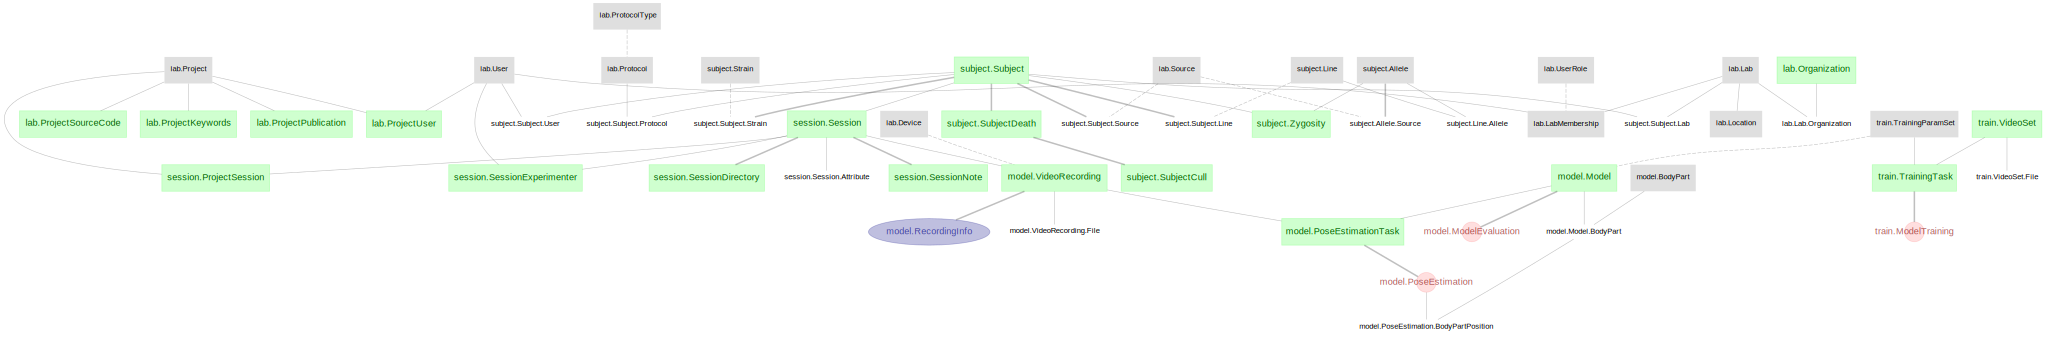

In [5]:
(
    dj.Diagram(subject) 
    + dj.Diagram(lab) 
    + dj.Diagram(session) 
    + dj.Diagram(model) 
    + dj.Diagram(train)
)

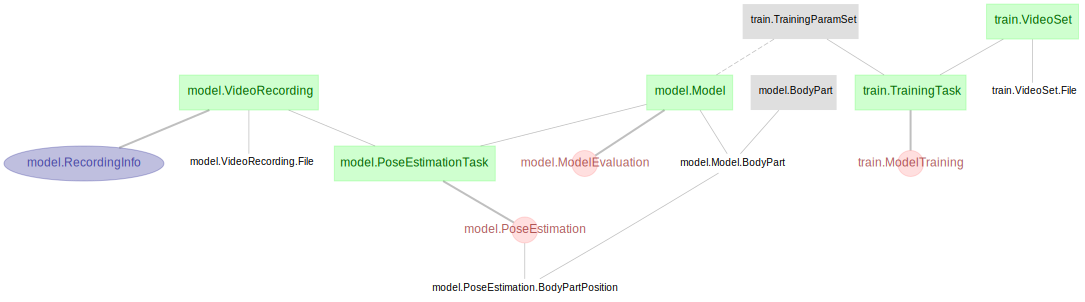

In [6]:
dj.Diagram(model) + dj.Diagram(train)

## Step 1 - Register an existing model in DataJoint pipeline

A DeepLabCut model is defined in a DLC-specific folder structure with a file named `config.yaml` that contains the specifications of a DLC model.

To "register" this DLC model with DataJoint, you can just specify this config file. See example below

In [7]:
config_file_rel = "./example_data/inbox/from_top_tracking-DataJoint-2023-10-11/config.yaml"

In [8]:
model.Model.insert_new_model(model_name='from_top_tracking_model_test',
                             dlc_config=config_file_rel,
                             shuffle=1,
                             trainingsetindex=0,
                             model_description='Model in example data: from_top_tracking model')

2023-10-14 07:16:42.318459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 07:16:42.442151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/site-packages/cv2/../../lib64:/lib:/opt/conda/lib
2023-10-14 07:16:42.442185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-14 07:16:42.466555: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
--- DLC Model specification to be inserted ---
	model_name: from_top_tracking_model_test
	model_description: Model in example data: from_top_tracking model
	scorer: DLCresnet50fromtoptrackingOct11shuffle1
	task: from_top_tracking
	date: Oct11
	iteration: 0
	snapshotindex: -1
	shuffle: 1
	trainingsetindex: 0
	project_path: from_top_tracking-DataJoint-2023-10-11
	paramset_idx: None
	-- Template/Contents of config.yaml --
		Task: from_top_tracking
		scorer: DataJoint
		date: Oct11
		multianimalproject: False
		identity: None
		project_path: /workspaces/element-deeplabcut/example_data/inbox/from_top_tracking-DataJoint-2023-10-11
		video_sets: {'/Users/milagros/Desktop/from_top_tracking-DataJoint-2023-10-11/videos/test.mp4': {'crop': '0, 500, 0, 500'}, '/Users/milagros/Desktop/from_top_tracking-DataJoint-2023-10-11/videos/train1.mp4': {'crop': '0, 500, 0, 500'}}
		bodyparts: ['hea

In [9]:
model.Model()

model_name User-friendly model name,task Task in the config yaml,date Date in the config yaml,iteration Iteration/version of this model,"snapshotindex which snapshot for prediction (if -1, latest)",shuffle Shuffle (1) or not (0),trainingsetindex Index of training fraction list in config.yaml,scorer Scorer/network name - DLC's GetScorerName(),config_template Dictionary of the config for analyze_videos(),project_path DLC's project_path in config relative to root,model_prefix,model_description,paramset_idx
from_top_tracking_model_test,from_top_tracking,Oct11,0,-1,1,0,DLCresnet50fromtoptrackingOct11shuffle1,=BLOB=,from_top_tracking-DataJoint-2023-10-11,,Model in example data: from_top_tracking model,None


## Step 2 - Insert Subject, Session, and Behavior Videos

In [10]:
subject.Subject()

subject,subject_nickname,sex,subject_birth_date,subject_description
subject6,,F,2020-01-01,hneih_E105


In [11]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject6",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="hneih_E105",
    ),
    skip_duplicates=True,
)

In [12]:
#Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject6", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject6", session_datetime="2021-06-03 14:43:10"),
]

#Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)
session.Session()

subject,session_datetime
subject6,2021-06-02 14:04:22
subject6,2021-06-03 14:43:10


In [13]:
### VideoRecording
recording_key = {'subject': 'subject6',
       'session_datetime': '2021-06-02 14:04:22',
       'recording_id': '1'}
model.VideoRecording.insert1({**recording_key, 'device': 'Camera1'}, skip_duplicates=True)

In [14]:
### VideoRecording.File

video_files = ["./example_data/inbox/from_top_tracking-DataJoint-2023-10-11/videos/train1.mp4"]

model.VideoRecording.File.insert({
    **recording_key, 
    'file_id': v_idx, 
    'file_path': Path(f)} for v_idx, f in enumerate(video_files))

In [15]:
### RecordingInfo
model.RecordingInfo.populate()
model.RecordingInfo()

subject,session_datetime,recording_id,px_height height in pixels,px_width width in pixels,nframes number of frames,fps (Hz) frames per second,recording_datetime Datetime for the start of the recording,recording_duration video duration (s) from nframes / fps
subject6,2021-06-02 14:04:22,1,500,500,60000,60,None,1000.0


## Step 3 - DLC inference task

{summary about next line}

In [16]:
model.PoseEstimationTask.describe()

-> model.VideoRecording
-> model.Model
---
task_mode="load"     : enum('load','trigger')       # load results or trigger computation
pose_estimation_output_dir="" : varchar(255)                 # output dir relative to the root dir
pose_estimation_params=null : longblob                     # analyze_videos params, if not default



'-> model.VideoRecording\n-> model.Model\n---\ntask_mode="load"     : enum(\'load\',\'trigger\')       # load results or trigger computation\npose_estimation_output_dir="" : varchar(255)                 # output dir relative to the root dir\npose_estimation_params=null : longblob                     # analyze_videos params, if not default\n'

In [17]:
recording_key

{'subject': 'subject6',
 'session_datetime': '2021-06-02 14:04:22',
 'recording_id': '1'}

In [18]:
task_key = {**recording_key, 'model_name': 'from_top_tracking_model_test'}

In [19]:
model.PoseEstimationTask.insert1(
    {**task_key,
     'task_mode': 'load',
     'pose_estimation_output_dir': './example_data/outbox/from_top_tracking-DataJoint-2023-10-11/videos/device_1_recording_1_model_from_top_tracking_100000_maxiters'
     })

In [20]:
model.PoseEstimationTask()

subject,session_datetime,recording_id,model_name User-friendly model name,task_mode load results or trigger computation,pose_estimation_output_dir output dir relative to the root dir,"pose_estimation_params analyze_videos params, if not default"
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,load,./example_data/outbox/from_top_tracking-DataJoint-2023-10-11/videos/device_1_recording_1_model_from_top_tracking_100000_maxiters,=BLOB=


In [21]:
### PoseEstimation
model.PoseEstimation.populate()

In [22]:
model.PoseEstimation()

subject,session_datetime,recording_id,model_name User-friendly model name,pose_estimation_time time of generation of this set of DLC results
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,2023-10-12 15:21:47


In [23]:
### Results
model.PoseEstimation.BodyPartPosition()

subject,session_datetime,recording_id,model_name User-friendly model name,body_part,frame_index frame index in model,x_pos,y_pos,z_pos,likelihood
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [24]:
df = (model.PoseEstimation.BodyPartPosition & task_key).fetch(format='frame').reset_index()

In [25]:
df = df.explode(['frame_index', 'x_pos', 'y_pos', 'likelihood']).reset_index()
df

,index,subject,session_datetime,recording_id,model_name,body_part,frame_index,x_pos,y_pos,z_pos,likelihood
0,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,0,273.996613,314.971008,None,0.999999
1,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,1,274.103363,315.145966,None,0.999999
2,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,2,274.032654,315.133331,None,0.999999
3,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,3,274.025238,315.152283,None,0.999999
4,0,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,head,4,274.073181,315.173248,None,0.999999
...,...,...,...,...,...,...,...,...,...,...,...
119995,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59995,323.293884,33.214066,None,1.0
119996,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59996,321.602264,32.794708,None,1.0
119997,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59997,320.173981,32.857304,None,1.0
119998,1,subject6,2021-06-02 14:04:22,1,from_top_tracking_model_test,tailbase,59998,318.708618,33.147358,None,0.999999


## Step 4 - Visualization of results

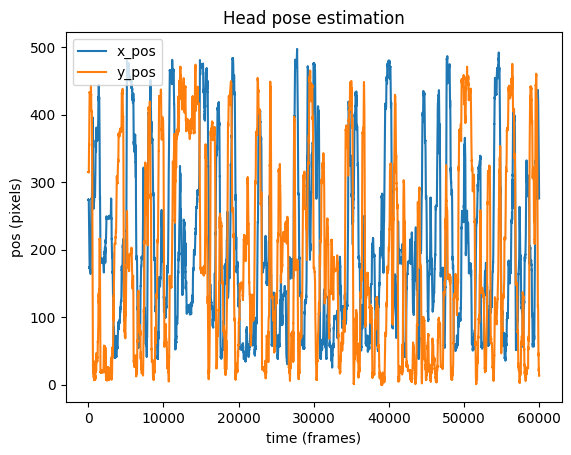

In [26]:
import matplotlib.pyplot as plt

head_data = df[df['body_part'] == 'head']
tail_data = df[df['body_part'] == 'tailbase']

plt.title('Head pose estimation')
plt.plot(head_data['x_pos'],label='x_pos')
plt.plot(head_data['y_pos'],label='y_pos')
plt.xlabel('time (frames)')
plt.ylabel('pos (pixels)')
plt.legend()
plt.show()

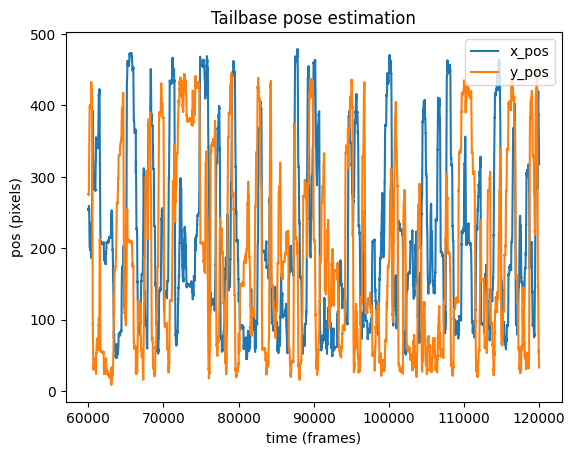

In [27]:
plt.title('Tailbase pose estimation')
plt.plot(tail_data['x_pos'],label='x_pos')
plt.plot(tail_data['y_pos'],label='y_pos')
plt.xlabel('time (frames)')
plt.ylabel('pos (pixels)')
plt.legend()
plt.show()

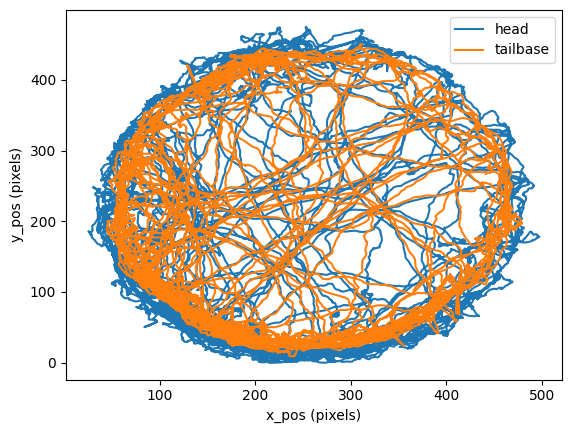

In [28]:
plt.plot(head_data['x_pos'], head_data['y_pos'], label='head')
plt.plot(tail_data['x_pos'], tail_data['y_pos'], label='tailbase')
plt.xlabel('x_pos (pixels)')
plt.ylabel('y_pos (pixels)')
plt.legend()
plt.show()
